In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

# Define CPPN (Compositional Pattern Producing Networks)

In [22]:
def sigmoid( x):
    return 1.0 / (1.0 + np.exp(-1 * x))

act_fun_map = { "id": lambda x: x
              , "tanh": np.tanh
              , "sigmoid" : sigmoid
              }

def toImg(output, mode="RGB"):
    return Image.fromarray(np.asarray(output*255, dtype=np.int8), mode=mode)

class CPPN(object):
    def __init__(self, layer_description, RGB=False, extra_input_dim=16):
        """ @param layer_description: [(layersize, act_fun_name)] list """
        self.layer_description = layer_description
        self.RGB = RGB
        self.extra_input_dim = extra_input_dim
        
        inp_size = 3 + extra_input_dim
        num_output_channels = 1 if RGB == False else 3
        
        # build the model
        self.layers = []
        for l in self.layer_description:
            # build the network structure one layer at a time
            # initialize random weight matrix
            # assign activation function to layer
            
        # final readout
        matrix  = np.random.standard_normal(size = (inp_size, num_output_channels)).astype(np.float32)
        self.layers.append((matrix, act_fun_map["sigmoid"]))
        
    def generate_input(self, x_res=256, y_res=256, scaling=1.0, extra_input = None):
        
        # generate coordinate inputs (x_mat, y_mat, r_mat).
        # recommended functions: np.linspace, np.meshgrid
        
        # x_range = np.linspace(-1*scaling, scaling, num = x_res)
        
        inp = [x_mat, y_mat, r_mat]
        
        # generate extra input layers (latent vector): all pixels have the same latent vector
        # recommended functions: np.tile, np.stack
            
        # inp.shape -> (x_res, y_res, 3 + extra_input_dim)
        return inp

    def process(self, inp):
        x = inp
        for l in self.layers:
            matrix, actfun = l
            x = actfun(np.matmul(x, matrix))
        return x

# Generate images

In [23]:
cppn = CPPN(RGB=True, layer_description=[(128,"tanh"),(16,"tanh"),(16,"tanh")], extra_input_dim=32)

In [21]:
inp = cppn.generate_input(x_res=512, y_res=512, scaling=10.0)
out = cppn.process(inp)
out.shape

(512, 512, 3)

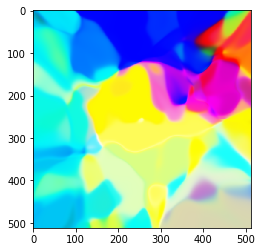

In [18]:
plt.imshow(np.squeeze(out), interpolation='nearest')

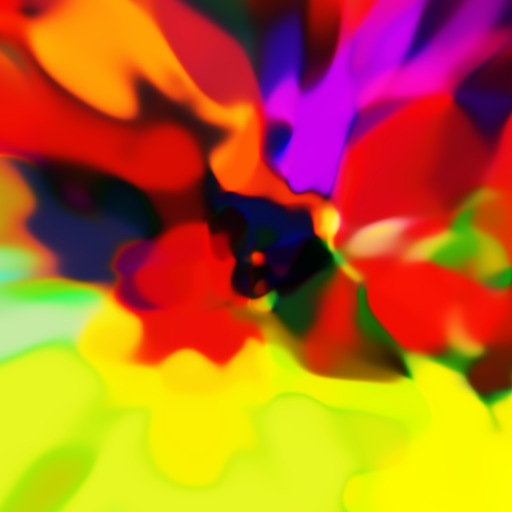

In [83]:
toImg(out)

In [84]:
img = toImg(out)
img.save("128-16-16_h32_1.png")

## add specific input

In [80]:
extra = np.random.uniform(low=-1, high=1, size=32)
extra

array([-0.10166395,  0.40264087, -0.46101377,  0.70470807,  0.32970766,
       -0.05295251, -0.33103057, -0.91255371,  0.52093112,  0.93252379,
       -0.54119433,  0.57866119, -0.66106865, -0.80352264, -0.54837408,
        0.77888667, -0.49545191,  0.975196  , -0.81888401, -0.6525466 ,
        0.70444565,  0.82085609,  0.73016843,  0.5709124 ,  0.4709083 ,
       -0.81837311,  0.34880875, -0.23466935, -0.49709036, -0.80849912,
       -0.9356019 ,  0.04613648])

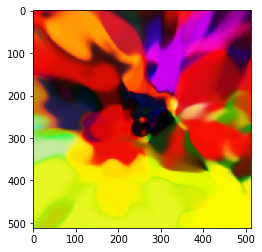

In [81]:
inp = cppn.generate_input(x_res=512, y_res=512, scaling=10.0, extra_input=2*extra)
out = cppn.process(inp)
plt.imshow(np.squeeze(out), interpolation='nearest')

## latent walk

If you have implemented latent vector inputs as "extra inputs" above, you can now explore this latent vector space.
- Try implementing a simple "latent walk" by defining two points in the latent space and interpolating between these two points.
- For each step in the interpolation, generate a new image with the new latent vector as inputs. 
    - If you can use numpy's broadcasting to your advantage, you won't need to write a loop in this step...
- Combine these images into a gif to visualize the path the network takes through the latent space.

For extra fun:
- Instead of interpolating between two points, try creating a (quasi-)periodic orbit in latent space.


In [72]:
inps = generate_input_batch(cppn, x_res, y_res, extra_inputs=path)
outs = cppn.process(inps)
outs.shape

(20, 512, 512, 3)

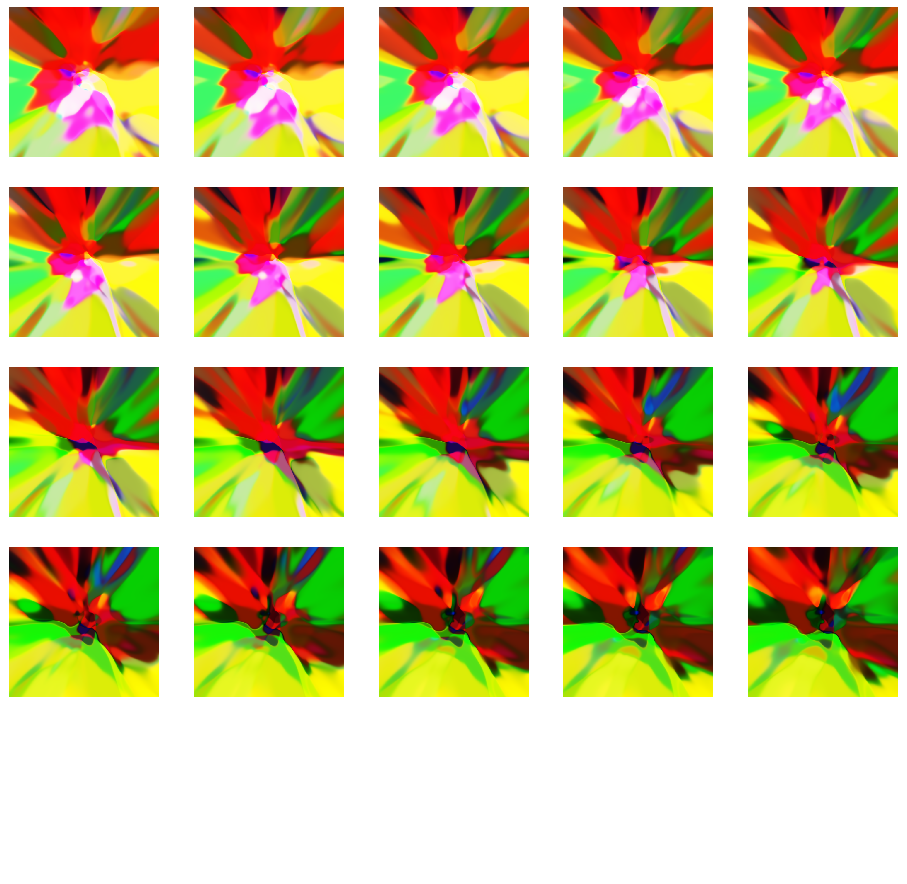

In [73]:
num = out.shape[0]
cols = 5
fig, axs = plt.subplots(num//cols+1,cols, figsize=(16,16))
for idx, (ix,iy) in enumerate(np.ndindex(axs.shape)):
    axs[ix,iy].set_axis_off()
    if idx<num:
        axs[ix,iy].imshow(outs[idx])

### Export GIF

In [ ]:
imgs = [ toImg(o) for o in outs ]  #

In [ ]:
imgs[0].save('latent-walk.gif', format='GIF', append_images=list(imgs[1:]) + list(reversed(list(imgs[1:-1]))) , save_all=True, duration=10, loop=0)